# KNN on Iris Dataset

## Project Overview
This project applies the **K-Nearest Neighbors (KNN)** algorithm to classify iris flowers into **Setosa**, **Versicolor**, and **Virginica** species based on their sepal and petal measurements.

## Dataset
- **Source:** Scikit-learn built-in dataset
- **Samples:** 150
- **Features:** Sepal Length, Sepal Width, Petal Length, Petal Width
- **Target:** Species of Iris flower

## Steps Followed
1. Data Loading & Exploration
2. Visualization
3. Train-test split & Scaling
4. Optimal k selection using Elbow Method
5. Model training & evaluation
6. Decision boundary visualization


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Dataset Information & Summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

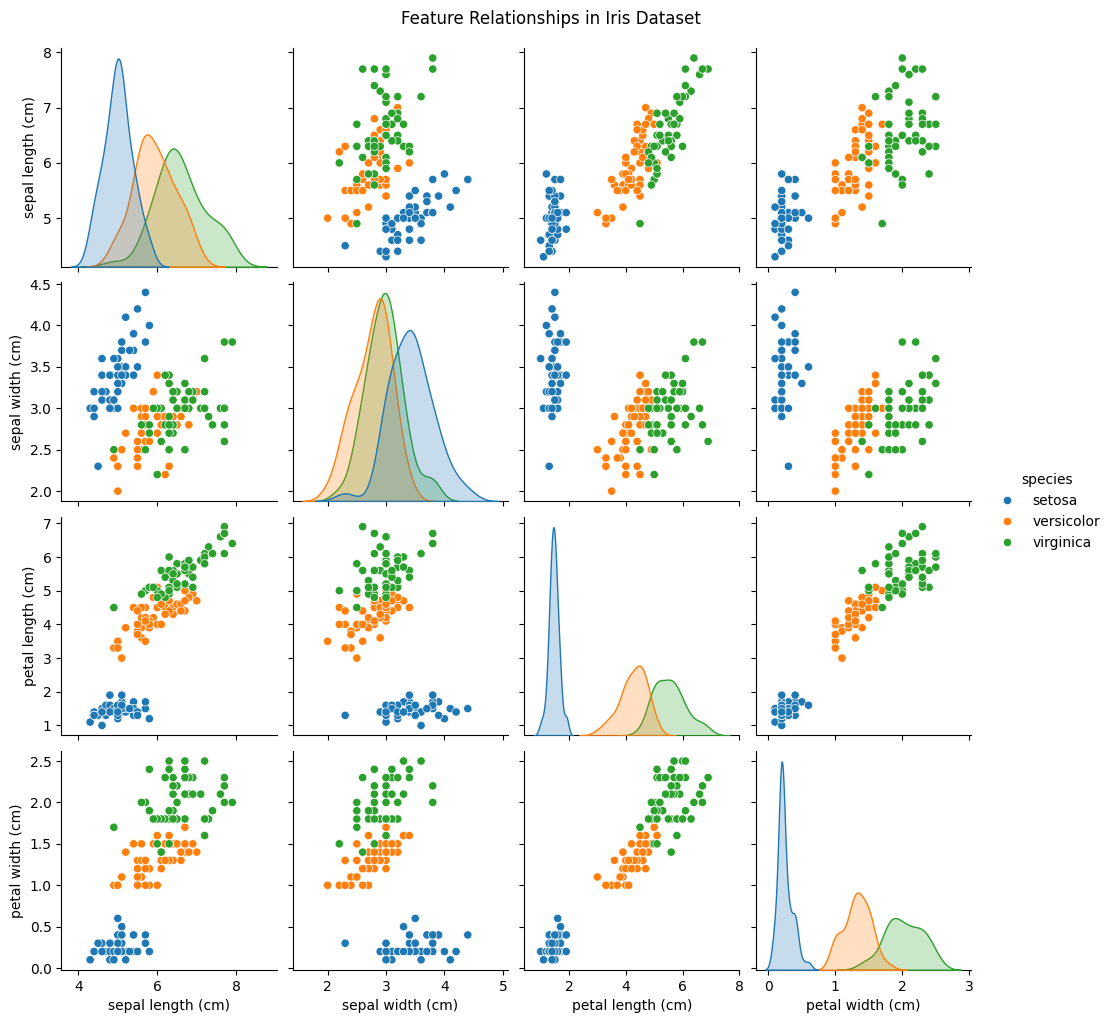

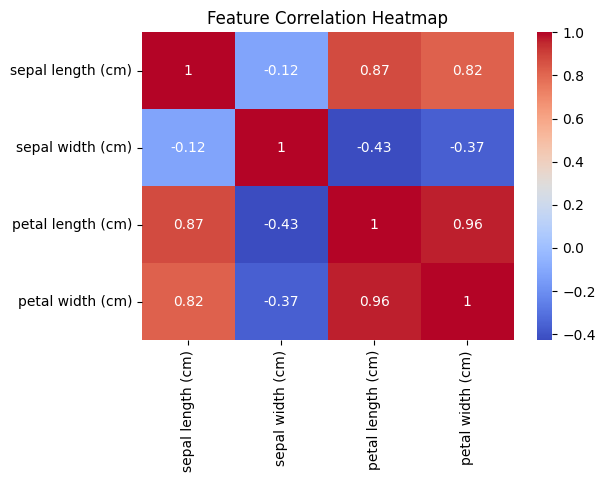

In [4]:
# Data Visualization
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Feature Relationships in Iris Dataset", y=1.02)
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [5]:
# Split Data
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

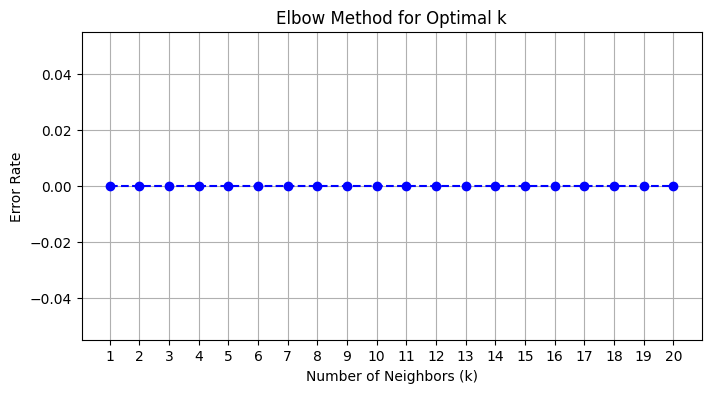

Optimal k found: 1


In [7]:
# Optimal k using Elbow Method
error_rates = []
k_range = range(1, 21)
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    error_rates.append(np.mean(y_pred_temp != y_test))

plt.figure(figsize=(8, 4))
plt.plot(k_range, error_rates, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

optimal_k = error_rates.index(min(error_rates)) + 1
print(f"Optimal k found: {optimal_k}")

In [8]:
# Train Final KNN Model
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


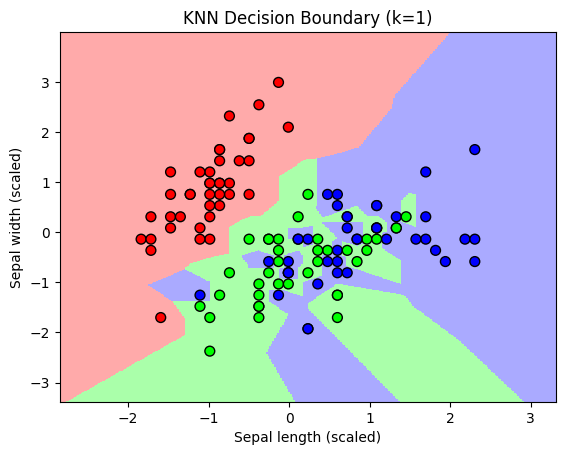

In [9]:
# Decision Boundary (2D Example)
from matplotlib.colors import ListedColormap

X_plot = X_train_scaled[:, :2]
y_plot = y_train.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

knn_plot = KNeighborsClassifier(n_neighbors=optimal_k)
knn_plot.fit(X_plot, y_plot)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolor='k', s=50, cmap=ListedColormap(cmap_bold))
plt.xlabel('Sepal length (scaled)')
plt.ylabel('Sepal width (scaled)')
plt.title(f"KNN Decision Boundary (k={optimal_k})")
plt.show()